# **Proyek Analisis Data: Bike Sharing Dataset**
- **Nama:** Annas Brigita Br Karo Sekali
- **Email:** brigitakari777@student.ub.ac.id
- **ID Dicoding:** annas_brigita

## **Menentukan Pertanyaan Bisnis**

- Apakah ada pengaruh variabel cuaca terhadap jumlah pengguna sepeda?
- Apakah ada pengaruh variabel musim terhadap jumlah pengguna sepeda?
- Bagaimana perbandingan jumlah pengguna sepeda antara tahun 2011 dan 2012?
- Apakah ada pengaruh hari terhadap jumlah pengguna sepeda?

## **Import Semua Packages/Library yang Digunakan**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## **Data Wrangling**

### **Gathering Data**

Saya memilih Bike Sharing Dataset, maka saya mengimpor file day.csv dan hr.csv sebagai berikut:

#### TABEL DAY

In [3]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### TABEL HR

In [4]:
hr_df = pd.read_csv("/content/hour.csv")
hr_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

### **Assessing Data day_df**

  **1. Cek Tipe Data day_df**

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Setelah mengecek info data day, terdapat 1 tipe data berdasarkan kolomnya yang tidak sesuai, yaitu kolom dteday dan akan diubah menjadi datetime

**2. Cek Missing Values**

In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Kesimpulan: Tidak terdapat missing values

**3. Cek Data Duplikat**

In [7]:
print("Jumlah data duplikat: ", day_df.duplicated().sum())

Jumlah data duplikat:  0


Kesimpulan: Tidak terdapat duplikasi data.

**4. Deskriptif Statistik**

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### **Assessing Data hr_df**

**1. Cek Tipe Data hr_df**


In [9]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Setelah mengecek info data day, terdapat 1 tipe data berdasarkan kolomnya yang tidak sesuai, yaitu kolom dteday dan akan diubah menjadi datetime

**2. Cek Missing Values**

In [10]:
hr_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Kesimpulan: Tidak terdapat missing values

**3. Cek Data Duplikat**

In [11]:
print("Jumlah data duplikat: ", hr_df.duplicated().sum())

Jumlah data duplikat:  0


Kesimpulan: Tidak terdapat duplikasi data.

**4. Deskriptif Statistik**

In [12]:
hr_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### **Cleaning Data**

**1. Menghapus tabel dan kolom yang tidak diperlukan**

Hapus tabel hr karena tidak relevan dengan pertanyaan bisnis. Selain itu, beberapa kolom juga dihapus, seperti:
- instant: Karena indeks catatan ini tidak memberikan informasi tambahan yang berguna.
- windspeed: Tidak ada pertanyaan bisnis yang terkait dengan efek kecepatan angin terhadap jumlah penyewa sepeda.

In [13]:
del hr_df

In [14]:
drop_col = ['instant', 'windspeed']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


**2. Mengubah detail kolom**

In [15]:
# Mengubah angka menjadi keterangan
day_df['mnth'] = day_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

day_df.head()


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


In [16]:
# Mengubah tipe data ke datetime
day_df['dteday'] = pd.to_datetime(day_df.dteday)

# Mengubah tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  cnt         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


## **Exploratory Data Analysis (EDA)**

**1. Kelompokkan penyewa sepeda berdasarkan bulan**

In [17]:
day_df.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
       max   min         mean     sum
mnth                                 
Apr   7460   795  4484.900000  269094
Aug   7865  1115  5664.419355  351194
Dec   6606   441  3403.806452  211036
Feb   5062  1005  2655.298246  151352
Jan   4521   431  2176.338710  134933
Jul   8173  3285  5563.677419  344948
Jun   8120  3767  5772.366667  346342
Mar   8362   605  3692.258065  228920
May   8294  2633  5349.774194  331686
Nov   6852  1495  4247.183333  254831
Oct   8156    22  5199.225806  322352
Sep   8714  1842  5766.516667  345991

Berdasarkan hasil eksploratori di atas, dapat disimpulkan bahwa bulan yang memiliki rata-rata terbesar dan jumlah terbanyak adalah bulan Juni. Sedangkan rata-rata terkecil dan jumlah terkecil adalah bulan Januari.

**2. Kelompokkan penyewa sepeda berdasarkan keadaan cuaca**


In [18]:
day_df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
                      max  min         mean      sum
weathersit                                          
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Berdasarkan hasil diatas, dapat disimpulkan bahwa para penyewa sepeda cenderung menyewa pada saat cuaca ketika sedang cerah atau mendung. Sangat sedikit ketika salju turun dan tidak ada ketika cuaca sedang sangat buruk.

**3. Kelompokkan penyewa sepeda berdasarkan holiday**

In [19]:
day_df.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Berdasarkan hasil diatas, dapat disimpulkan bahwa para penyewa sepeda lebih suka menyewa sepeda saat bukan hari-hari libur, melainkan pada saat hari-hari biasa.

**4. Korelasi antara penyewa casual, registered, dan count**

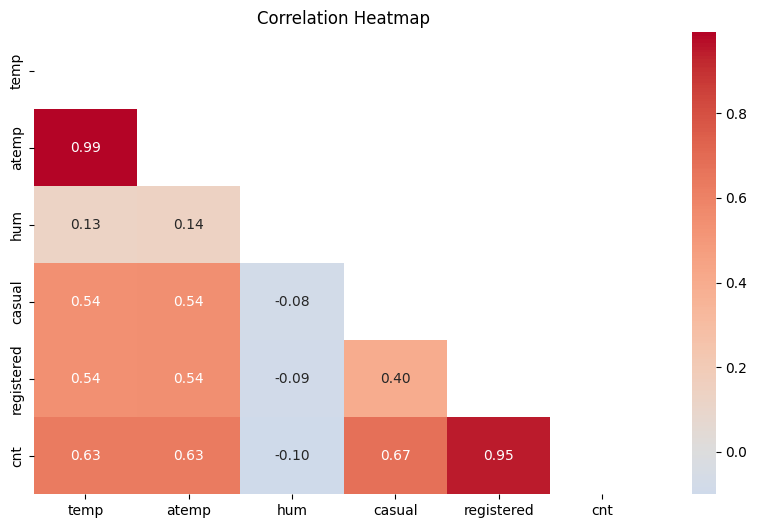

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Berdasarkan hasil analisis diatas, didapat pernyataan sebagai berikut:

- atemp dan temp berkorelasi kuat (0.99).
- hum memiliki korelasi lemah dengan temp dan atemp (0.13 dan 0.14).
- casual cukup berkorelasi dengan temp dan atemp (0.54), dan memiliki hubungan negatif dengan hum (-0.08).
- registered memiliki pola yang sama seperti casual, dan berkorelasi dengan casual (0.40).
- cnt berkorelasi kuat dengan temp, atemp, casual, dan registered (0.63, 0.63, 0.67, dan 0.95), dan berkorelasi negatif dengan hum (-0.10).

## **Visualization & Explanatory Analysis**

### Pertanyaan 1: Apakah variabel cuaca mempengaruhi jumlah pengguna sepeda?


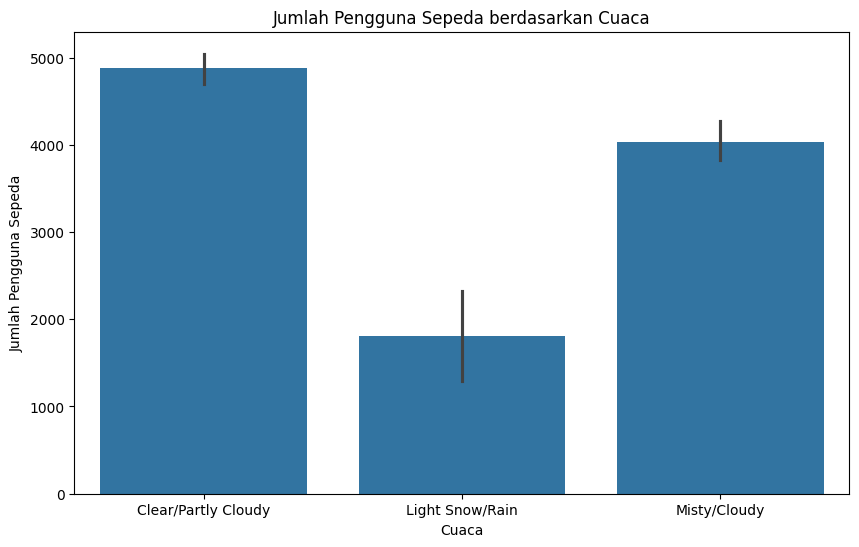

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weathersit',
    y='cnt',
    data=day_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Berdasarkan visualisasi data menggunakan histogram/barplot, dapat disimpulkan bahwa jelas terdapat hubungan antara kondisi cuaca dan penyewa sepeda, Kondisi cuaca saat sedang cerah/setengah mendung menjadi kondisi yang paling menghasilkan banyak pengguna sepeda, sedangkan cuaca berkabut/mendung menjadi opsi kedua terbanyak, dan terakhir ketika cuaca sedang sedikit bersalju/hujan menjadi yang paling sedikit diminati.

### Pertanyaan 2: Apakah ada pengaruh variabel musim terhadap jumlah pengguna sepeda?


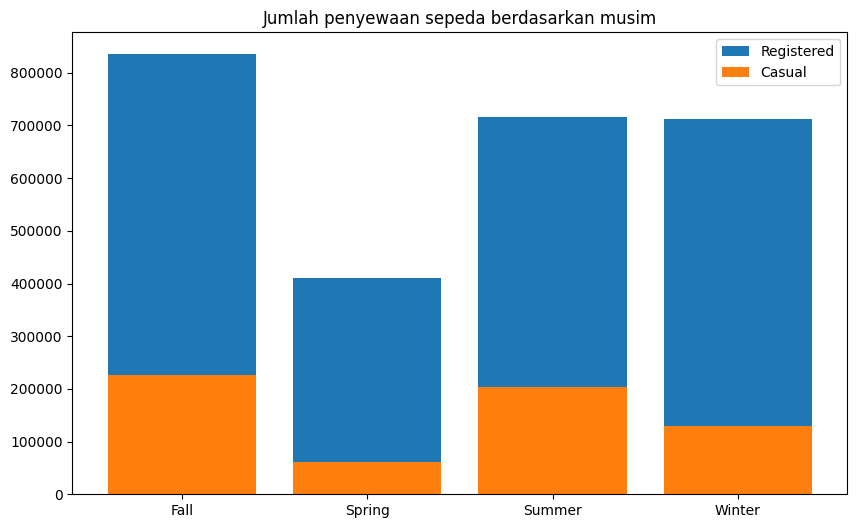

In [22]:
seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:blue'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:orange'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.legend()
plt.show()

Berdasarkan hasil analisis diatas menggunakan barplot, dapat disimpulkan bahwa di semua musim yang paling dinikmati bagi para pengguna sepeda (Casual dan Registered) adalah musim gugur (Fall), lalu diikuti dengan musim panas (Summer), musim dingin (Winter), dan diakhiri dengan musim semi (Spring).


### Pertanyaan 3: Bagaimana perbandingan jumlah pengguna sepeda antara tahun 2011 dan 2012?

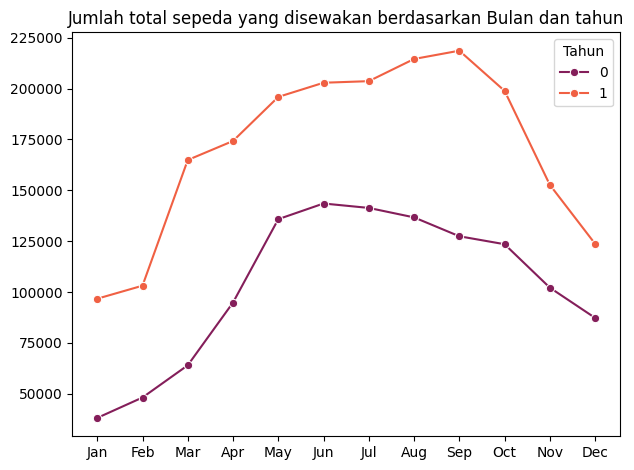

In [23]:
day_df['mnth'] = pd.Categorical(day_df['mnth'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["mnth","yr"]).agg({
    "cnt": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="mnth",
    y="cnt",
    hue="yr",
    palette="rocket",
    marker="o")

plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()


Berdasarkan lineplot di atas, dapat disimpulkan bahwa tahun 2012 (yang diwakili oleh angka 1) memiliki jumlah pengguna sepeda yang lebih banyak dibanding 2011. Puncak penyewaan sepeda pada tahun 2012 terjadi pada bulan September, sementara bulan yang paling sepi terjadi pada bulan januari. Sedangkan pada tahun 2011 puncak penyewaan sepeda terjadi pada bulan Juni dan memiliki penyewaan tersepi pada bulan Januari.

### Pertanyaan 4: Apakah ada pengaruh hari terhadap jumlah pengguna sepeda?

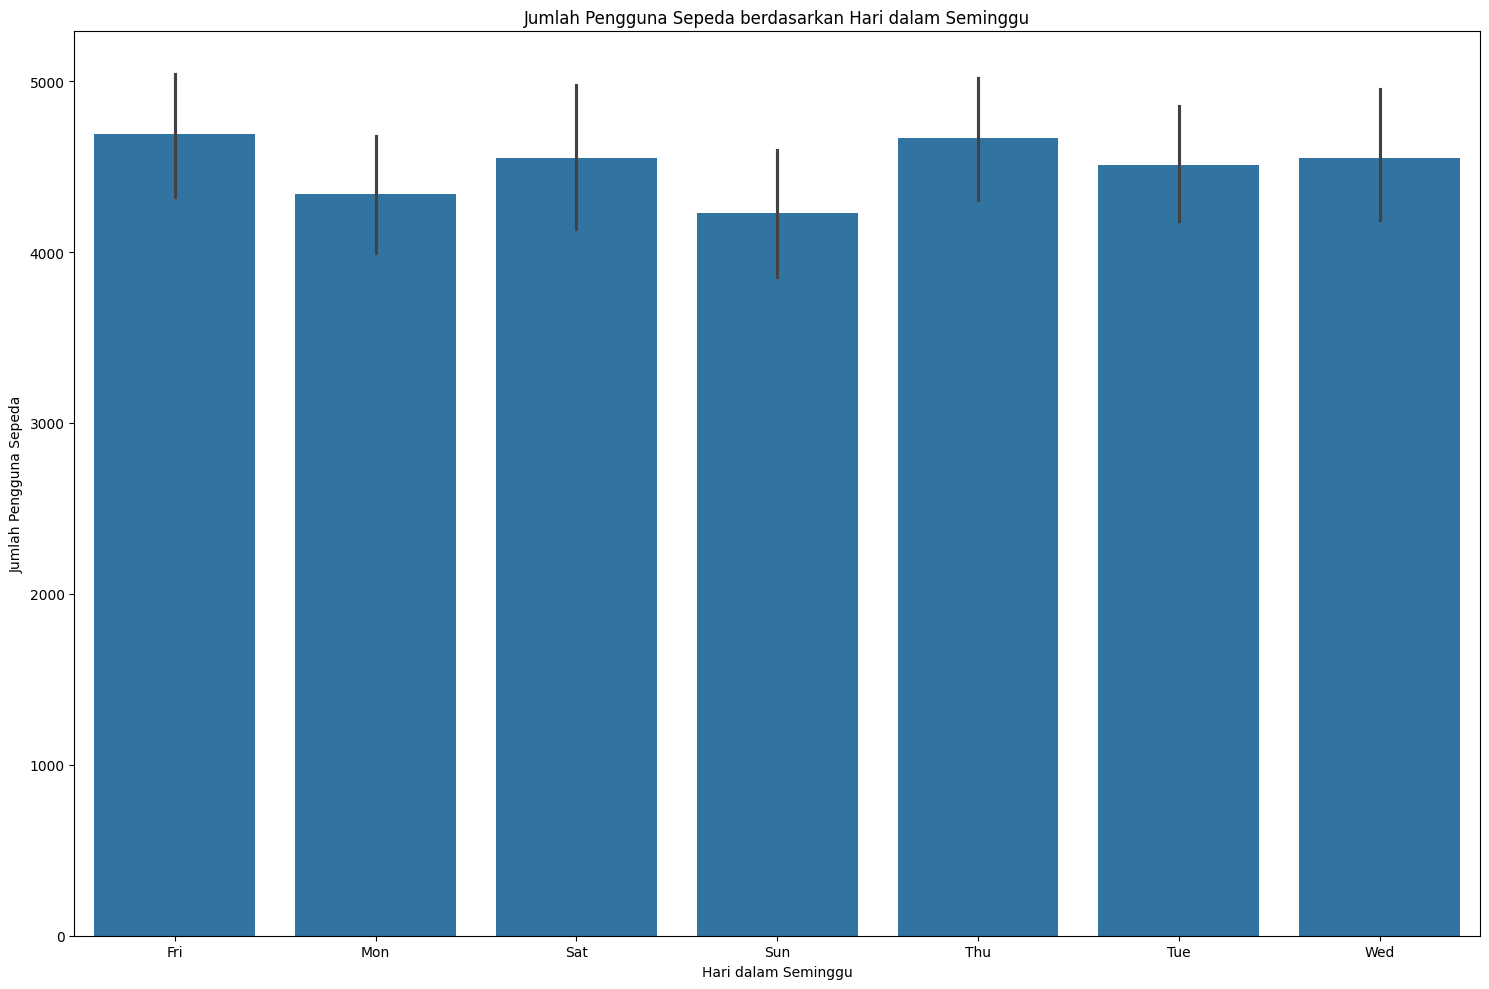

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

sns.barplot(
  x='weekday',
  y='cnt',
  data=day_df,
  ax=axes)
axes.set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
axes.set_xlabel('Hari dalam Seminggu')
axes.set_ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout()
plt.show()

Jumlah penyewa sepeda pada hari Jumat ialah yang menempati posisi pertama sebagai hari dengan penyewa sepeda terbanyak, dan hari Minggu menempati posisi terakhir dengan jumlah penyewa sepeda yang paling sedikit.

## **Conclusion**

- **Conclution pertanyaan 1**: Terdapat pengaruh variabel cuaca terhadap jumlah pengguna sepeda. Para penyewa sepeda sangat menyukai ketika cuaca sedang. Lalu posisi kedua ditempati ketika cuaca sedang Berkabut/Mendung. Terakhir pengguna kurang menyukai ketika suasana sedang Sedikit bersalju/Hujan.
- **Conclution pertanyaan 2**: Musim semi menjadi musim yang paling banyak memperoleh jumlah pengguna sepeda yang paling sedikit. Sedangkan Musim Gugur menjadi musim yang mampu meraih penyewaan sepeda sebanyak lebih dari 800000.
- **Conclution pertanyaan 3**: Melalui lineplot bisa disimpulkan bahwa terjadi perbedaan puncak dan dasar bulan pada kedua tahun tersebut. Puncak dari tahun 2011 berada pada bulan Juni dan dasarnya berada pada bulan Januari. Sedangkan Puncak dari tahun 2012 terdapat pada bulan September dan dasarnya sama yakni bulan Januari. Dan dari kedua visualisasi tersebut dapat kita amati bahwa jumlah total sepeda yang disewakan pada tahun 2012 secara keseluruhan lebih tinggi daripada pada tahun 2011.
- **Conclution pertanyaan 4**: Hari Jumat menjadi urutan pertama jumlah pengguna sepeda terbanyak dengan mean 4690.288462 dan di urutan terakhir ditempati oleh Minggu dengan mean 4228.828571.



In [25]:
day_df.to_csv("all_data.csv", index=False)